In [30]:
import xarray as xr

url = 'https://www.ncei.noaa.gov/thredds-ocean/dodsC/sar-winds/radarsat2/2021/09/RSAT2_KSAT_2021_09_16_03_00_06_0685076406_147.11W_72.55N_HH_C5_GFS05CDF_wind_level2_norcs.nc'

ds = xr.open_dataset(url)

ds

<xarray.Dataset>
Dimensions:                 (y: 1006, x: 1056, xfit: 6)
Coordinates:
    longitude               (y, x) float32 ...
    latitude                (y, x) float32 ...
Dimensions without coordinates: y, x, xfit
Data variables: (12/59)
    acquisition_time        datetime64[ns] ...
    nx                      int32 ...
    ny                      int32 ...
    nx0                     int32 ...
    ny0                     int32 ...
    nx00                    int32 ...
    ...                      ...
    incid_coef              (xfit) float64 ...
    incid_xexp              (xfit) float32 ...
    incid_yexp              (xfit) float32 ...
    rlook_coef              (xfit) float64 ...
    rlook_xexp              (xfit) float32 ...
    rlook_yexp              (xfit) float32 ...
Attributes: (12/80)
    title:                                    SAR winds at 10-m height neutra...
    source:                                   SAR imagery MacDonald, Dettwile...
    history:                                  ANSWRS 2.0 MacDonald, Dettwiler...
    reference:                                SAROPS Version: Release 1.0, No...
    comments:                                 Operational as of May 1, 2013
    Conventions:                              CF-1.6
    ...                                       ...
    answrs%3aproduct_type:                    SCF
    answrs%3aicefile:                         BLANK
    answrs%3aicefile_time_js:                 6.8506560e+08
    answrs%3aicefile_time:                    BLANK
    answrs%3asen_cpol_remove_noise:           BLANK
    answrs%3asen_xpol_remove_noise:           BLANK

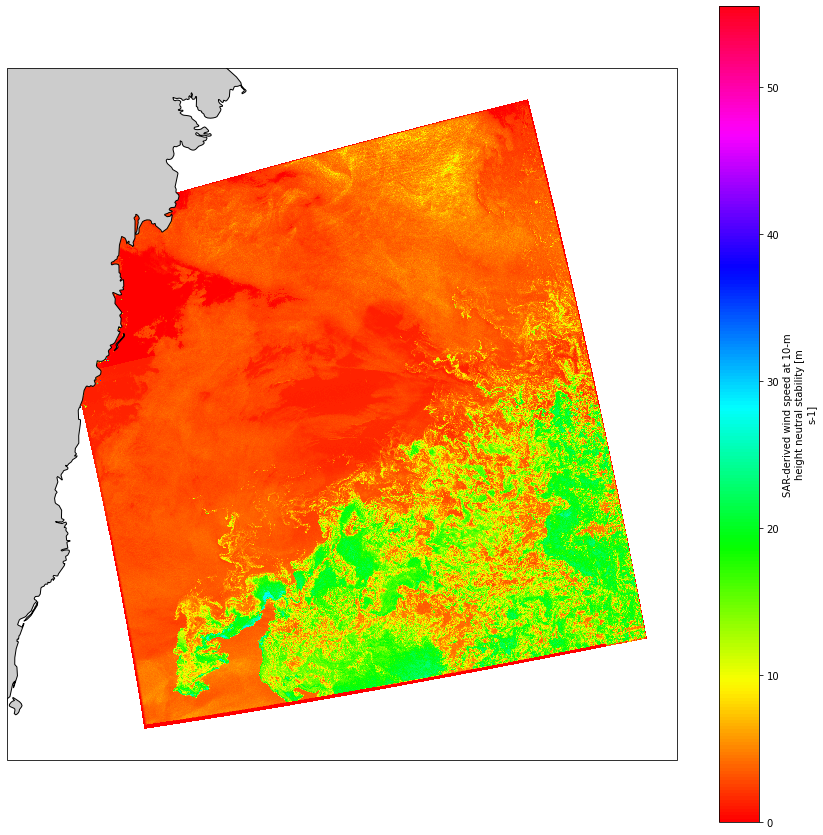

In [36]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

lat = ds.scene_center_latitude #float(url.split("_")[-7].replace("N",""))
lon = ds.scene_center_longitude #float(url.split("_")[-8].replace("W",""))*-1

proj = ccrs.LambertConformal(central_longitude=lon, central_latitude=lat)
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection=proj)
ds.sar_wind.plot(x = 'longitude', y = 'latitude', 
                 transform = ccrs.PlateCarree(),
                 cmap = 'hsv')

coast_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='k', facecolor='0.8')
ax.add_feature(coast_10m)


In [34]:
ds.info()

xarray.Dataset {
dimensions:
	y = 1006 ;
	x = 1056 ;
	xfit = 6 ;

variables:
	datetime64[ns] acquisition_time() ;
		acquisition_time:long_name = Acqusition time in Julian seconds since 2000-01-01T00:00:00Z ;
		acquisition_time:standard_name = time ;
	int32 nx() ;
		nx:units = 1 ;
		nx:long_name = Number of elements in this file ;
	int32 ny() ;
		ny:units = 1 ;
		ny:long_name = Number of lines in this file ;
	int32 nx0() ;
		nx0:units = 1 ;
		nx0:long_name = Number of elements in SIO file ;
	int32 ny0() ;
		ny0:units = 1 ;
		ny0:long_name = Number of lines in SIO file ;
	int32 nx00() ;
		nx00:units = 1 ;
		nx00:long_name = Number of elements in original SAR file ;
	int32 ny00() ;
		ny00:units = 1 ;
		ny00:long_name = Number of lines in original SAR file ;
	float32 xn() ;
		xn:units = 1 ;
		xn:long_name = 1 ;
	float32 yn() ;
		yn:units = 1 ;
		yn:long_name = 1 ;
	float32 line_size() ;
		line_size:units = m ;
		line_size:long_name = Line size ;
	float32 pixel_size() ;
		pixel_size:units =

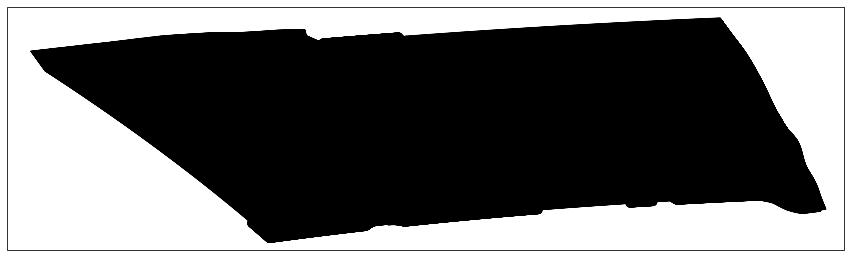

In [45]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np


def wind_spddir_to_uv(wspd,wdir):
    """
    calculated the u and v wind components from wind speed and direction
    Input:
        wspd: wind speed
        wdir: wind direction
    Output:
        u: u wind component
        v: v wind component
    """    
    
    rad = 4.0*np.arctan(1)/180.
    u = -wspd*np.sin(rad*wdir)
    v = -wspd*np.cos(rad*wdir)

    return u,v


lat = ds.scene_center_latitude
lon = ds.scene_center_longitude

proj = ccrs.LambertConformal(central_longitude=lon, central_latitude=lat)

fig = plt.figure(figsize=(15, 15))

ax = plt.axes(projection=proj)

u,v = wind_spddir_to_uv(ds['model_speed'], ds['input_dir'])

ax.barbs(ds['longitude'], ds['latitude'],
         u, v,
        )
# ds.sar_wind.plot(x = 'longitude', y = 'latitude', 
#                  transform = ccrs.PlateCarree(),
#                  #cmap = 'hsv',
#                  )

# coast_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
#                                         edgecolor='k', facecolor='0.8')
#ax.add_feature(coast_10m)